<a href="https://colab.research.google.com/github/SudeepSarkar/Computer-Vision-Course/blob/main/Lecture_5_Linear_Filtering_and_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Reading**: Section 3.2, correlation, convolution, Gaussian smoothing, 2D filtering using 1D filters.

Linear filtering is a basic operation done on the image for a variety of purposes, to reduce noise, sharpen features, emphasize certain kinds of features such as edges, corners, etc. 

See Fig 3.11 for examples.


Most common version is the weighted sum of neighboring pixels. This is called a **correlation** given by 
    \begin{eqnarray}
        g(i,j) & = & f \otimes h \\
               & = & \sum_{k=1}^N \sum_{l=1}^N h(k, l) f(i+k, j+l) \\
               & = & h \otimes f \\
               & = & \sum_{k,l} f(k, l) h(i+k, j+l) 
    \end{eqnarray}


The function $h(i,j)$ is called a filter or mask or kernel. Place the filter at a location, multiple, and then add to get the value. Note that the operation is *commutative*. So, equivalently shift the image, keeping the filter fixed, and then multiply and add. You have to careful about the coding appropriately for the array indices of the output array if you do so. 

What happens at the boundaries?

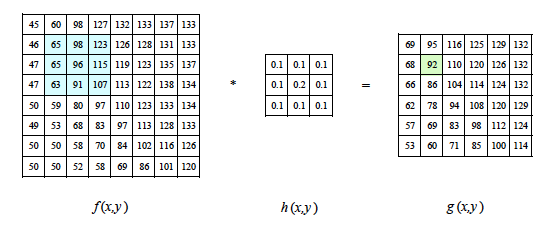

In [14]:
import numpy as np
h = np.array([[-1, 1],[-1, 1]])
f = np.zeros((10,10))
f[3:8,3:8] = np.ones((5, 5))

print("f=\n", f, "\nh=\n", h)

# So that we do not have to worry about indexing out of bounds
# We can also adjust how we want to fix the out of array bounds issue, which can
# be done my returning zero as in the following case or returning the boundary value
# which might be appropriate in certain conditions.
def my_array_ref (a, i, j):
    if ((i >= 0) & (i < a.shape [0]) & (j >= 0) & (j < a.shape [1])):
        return a[i, j]
    else :
        return 0

print(my_array_ref(f, -2, 3), my_array_ref(h, 0, 0))

g = np.zeros((10, 10))
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i+k, j+l)
        g[i, j] = prod_sum

print("f=\n", g)


f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
h=
 [[-1  1]
 [-1  1]]
0 -1
f=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Lecture 5 - Homework or Inclass Assignment

1. Change the code so that instead of returning zero when index is out of bounds, it should return the boundary value, i.e. for f(-2, 3) and f (2, 15) it should return f(0, 3) and f(2, 10), respectively.

2. Compute $ h \otimes (1 - f)$ using this new my_array_ref and compare it with the previous convention.

3. Submit on Canvas.

# Convolution

The **convolution** flips the filter about the origin and then correlates with the image function. The "flip" is with respect to the "origin" of the kernel. In the example above, the origin was the (0,0) entry of the kernel matrix, but that need not be the case always. Below are some examples of flipped kernels or masks.



For circularly symmetric kernels, flipping has no effect, so convolution is the same as correlation for them.

Mathematically, the convolution operations is given by     
\begin{eqnarray}
        f \star h & = & \sum_{k, l} h(k, l) f(i - k, j - l)  \\
        h \star f & = & \sum_{k, l} f(k, l) h(i - k, j - l)
\end{eqnarray}

Convolution is an important mathematical operation in signal processing, with very rich properties and plays a key role in the signal modeling of electrical circuits. If you are interested you can look up a MIT [signal processing lecture](https://ocw.mit.edu/resources/res-6-007-signals-and-systems-spring-2011/video-lectures/lecture-4-convolution/) such as for a fuller treatment of this topic.



In [37]:
print("f=\n", f, "\nh=\n", h)


g = np.zeros((10, 10))
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i-k, j-l)
        g[i, j] = prod_sum

print("f=\n", g)

f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
h=
 [[-1  1]
 [-1  1]]
f=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


#Question? (Impulse Response)

Let $f(i,j)$ be a zero valued function with only one non-zero entry at the center equal to 1, i.e. the input is an unit impulse. What is the convolution of this function with any mask, i.e. the impulse response? 

In [38]:
import scipy.ndimage as scimage
print("Using scipy convolve. Compare with previous. \n", sp.convolve(f, h))

f = np.zeros([10,10])
f[5, 5] = 1
g = scimage.convolve(f, h, mode='reflect', cval=1.0, origin=(0,0))
print("Impulse reponse of convolution: f=\n", f, "\n f*h=\n", g)



Using scipy convolve. Compare with previous. 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Impulse reponse of convolution: f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
 f*h=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 

# Properties of the convolution operations

1. **Convolution is a linear operation**: convolution of the sum of two images is the sum of the convolution of each of them. Convolution of a scaled version of a image is the scaled version of the convolution of the image.

\begin{equation}
         h \star (a f_1 + f_2) = a (h \star f_1) + (h \star f_2)
\end{equation}

2. Convolution is a **shift invariant operation** since the filter is the *same for each shift*.  So, convolution is a linear, shift-invariant (LSI) operation.
    
3. **Continuous version**

\begin{eqnarray}
        f \star h & = & \int_u \int_v f (u, v) h(x-u, y-v) du dv \\
         & = & \int_u \int_v h(u, v) f (x-u, y-v) du dv 
\end{eqnarray}
    
4. **Derivative of a convolution** is the convolution with the derivative
\begin{eqnarray}
        \frac{\partial}{\partial x} f \star h & = & \int_u \int_v  f (u, v) \left ( \frac{\partial}{\partial x} h(x-u, y-v) \right ) 
         du dv \\
         & = & \int_u \int_v  f (u, v) h_x(x-u, y-v)  du dv 
\end{eqnarray}

# Filtering with Gaussian shaped filters. 
Consider just one dimensional filtering for now. Let the filter be
    
\begin{equation}
        h(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2}
\end{equation}
    
And let the "image" be a **step function** $u(x)$.
\begin{equation}
        s(x) = \left \{ \begin{array}{l r}
                    1 & x \ge 0 \\
                    0 & x < 0 
                \end{array} \right .
\end{equation}
    
The convolution $g(x) = s(x) \star h(x) $ will smooth the sharp edge.
\begin{eqnarray}
        s(x) \star h(x) &  = & \int_u s(u) h (x - u) du \\
        & = & \int_{u=0}^{\infty} h (x - u) du \\
        & = & \int_{v=-\infty}^{x} h (v) dv
\end{eqnarray}
    
The derivative of the output $\frac{d}{dx} g(x) $ is a Gaussian function. 

\begin{eqnarray}
        \frac{d}{dx} g(x)  &  = & \frac{d}{dx} \int_{v=-\infty}^{x} h (v) dv \\
               & = & h(x)
\end{eqnarray}

This is equivalent to convolution with a derivative of a Gaussian function. You can verify this, i.e. $s(x) \star h'(x) = h(x)$ by doing the convolution mathematically. Use integration by parts in the derivation.

\begin{eqnarray}
        h'(x) & = & \frac{d}{dx} \left (\frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2} \right )\\
              & = &  - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2}
\end{eqnarray}

We can use this operation, i.e. convolution with a Gaussian followed by a derivative or convolution with a derivative of a Gaussian function for "edge" detection. The point of maximum marks the edge. 

Using the first derivative of a Gaussian by marking the local maxima in response is one the optimal method for detecting object boundaries based on intensity. The underlying assumption is that object edges are accompanied by intensity changes. However, note that not all intensity changes are due to object boundaries. (Can you think of some other causes for intensity changes in images?) ([Canny, 1986](https://ieeexplore.ieee.org/abstract/document/4767851)) showed that the first derivative of a Gaussian is the optimal filter shape that maximizes (i) strength of response, (ii) increases precision of edge localization, and (iii) supresses noise to the most extent. Later, ([Sarkar and Boyer, 1991](https://ieeexplore.ieee.org/abstract/document/103275)) showed how this filter can efficiently implemented using recursive digital filter involving fixed of operations, irrespective of scale (sigma) and suitable for direct hardware implementation. There are, of course, many many variation of this derivative idea for edge detection. Many edge detectors have been proposed in the literature. See ([Heath et al., 1997](https://ieeexplore.ieee.org/abstract/document/643893)) for an evaluation of edge detectors with respect to their capacity to sustain object recognition by humans.


Text(0.5, 1.0, 'Convolution with first derivative of Gaussian with different sigmas.')

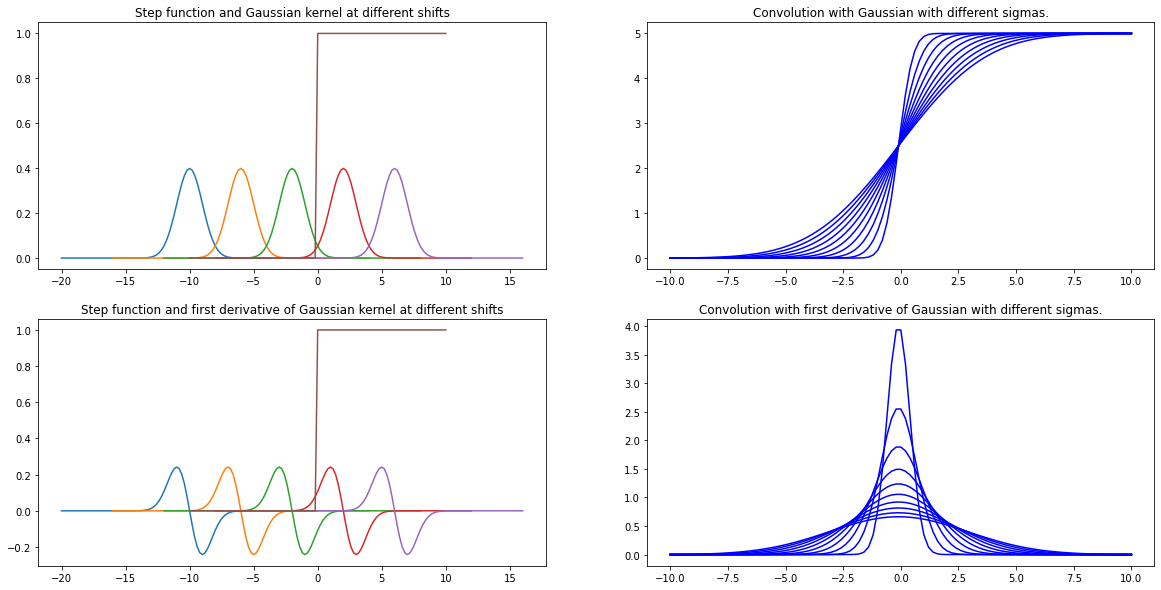

In [100]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 101)

def s(x) : # Step function
    return(np.ones(x.shape)*np.greater_equal(x, 0))

def gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma)))

def first_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3)))


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
for i in range (-10, 10, 4) :
  plt.plot(t+i, gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 2, 2)
for sigma in np.linspace(0.5, 3, 10):
    plt.plot(t, scimage.convolve(s(t), gaussian(t, sigma)), 'b')
plt.title('Convolution with Gaussian with different sigmas.')

plt.subplot(2,2,3)
for i in range (-10, 10, 4) :
  plt.plot(t+i, first_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and first derivative of Gaussian kernel at different shifts')

plt.subplot(2, 2, 4)
for sigma in np.linspace(0.5, 3, 10):
    plt.plot(t, scimage.convolve(s(t), first_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with first derivative of Gaussian with different sigmas.')



# Second derivative of a Gaussian

Take another derivative produces a **zero crossing ** at the edge location. This is equivalent to convolution with a second derivative of a Gaussian.
\begin{eqnarray}
        h''(x) & = &  \frac{d}{dx} \left ( - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} \right ) \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} + \frac{x^2}{\sqrt{2 \pi} \sigma^5} \exp - \frac{x^2}{2 \sigma^2} \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} 
        \left (1 - \frac{x^2}{\sigma^2} \right ) 
        \exp - \frac{x^2}{2 \sigma^2} 
\end{eqnarray}


Text(0.5, 1.0, 'Convolution with Gaussian with different sigmas.')

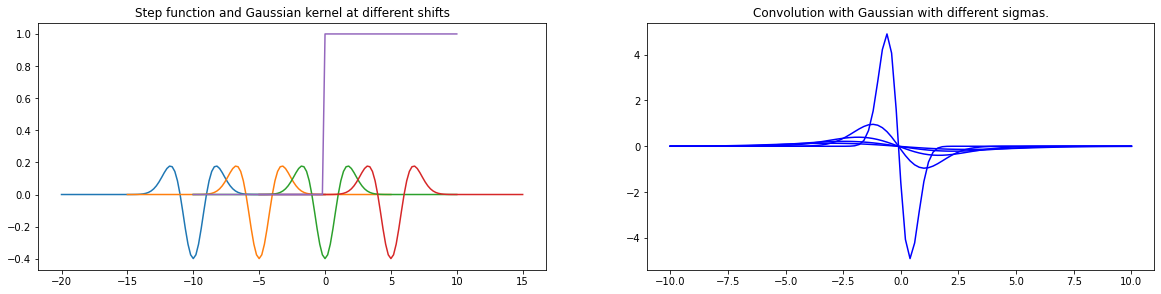

In [101]:

def second_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-(1 - x*x/(sigma*sigma))/(np.sqrt(2*np.pi)*sigma**3)))


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
for i in range (-10, 10, 5) :
  plt.plot(t+i, second_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 2, 2)
for sigma in np.linspace(0.5, 3, 5):
    plt.plot(t, scimage.convolve(s(t), second_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with Gaussian with different sigmas.')




# Approximations to Gaussian filtering

What does repeated convolutions with a filter shape achieve?

Consider the following bar shaped kernel (with unit area)
\begin{equation}
    r(x) = \left \{ \begin{array}{l r}
            \frac{1}{2w} & -w \le x \le w \\
            0 & \text{elsewhere} 
           \end{array} \right .
\end{equation}

Repeated convolution of a function $f(x)$ with this shape will be denoted by $r(x) * (r(x) * (r(x) * f(x)))$. Due to the linearity of the convolution operation, this repeated convolution can be associated in the following manner $(r(x) * (r(x) * (r(x))))* f(x)$, i.e. repeatedly convolve the kernel with itself first than convolve with the function at the end.

So, what the shape of $r(x) * r(x) * \cdots r(x)$ look like?

What happens if do not normalize the kernet to have an unit area under it?

In fact, these kernels do not have to be bar shaped. They can be a set of random kernels of limited with and we will end up with a Gaussian like shape!

If we convolve two Gaussian kernels of widths $\sigma_1$ and $\sigma_2$, we will end up with a Gaussian kernel of width $\sigma_1 + \sigma_2$. 

So, in the limiting case of repeated convolutions of a bar kernel, we will end up with a Gaussian kernel, of course, with a width that will be proportional to the number of it is repeated.

This information is relevant in the context of deep learning networks, esp those that are very deep and use small kernels at each layer. One can argue, they all effectively end up with varations of different Gaussian kernels, especially if we are using RelU. This is just my conjecture at this point. It remains to be validated. 


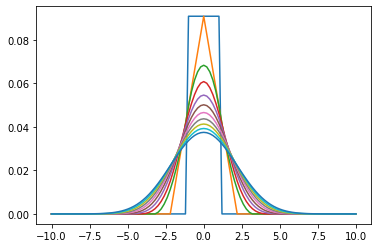

In [108]:
# repeated convolution with a bar shaped kernel results in a Gaussian shape
def r (x, w) :
    z = np.ones(x.shape[0])*np.less_equal(np.abs(x), w)
    return(z/z.sum())

plt.plot (t, r(t, 1))
h = r(t, 1)
for i in range(10) :
    h = scimage.convolve(h, r(t,1), origin = 0)
    plt.plot(t, h)

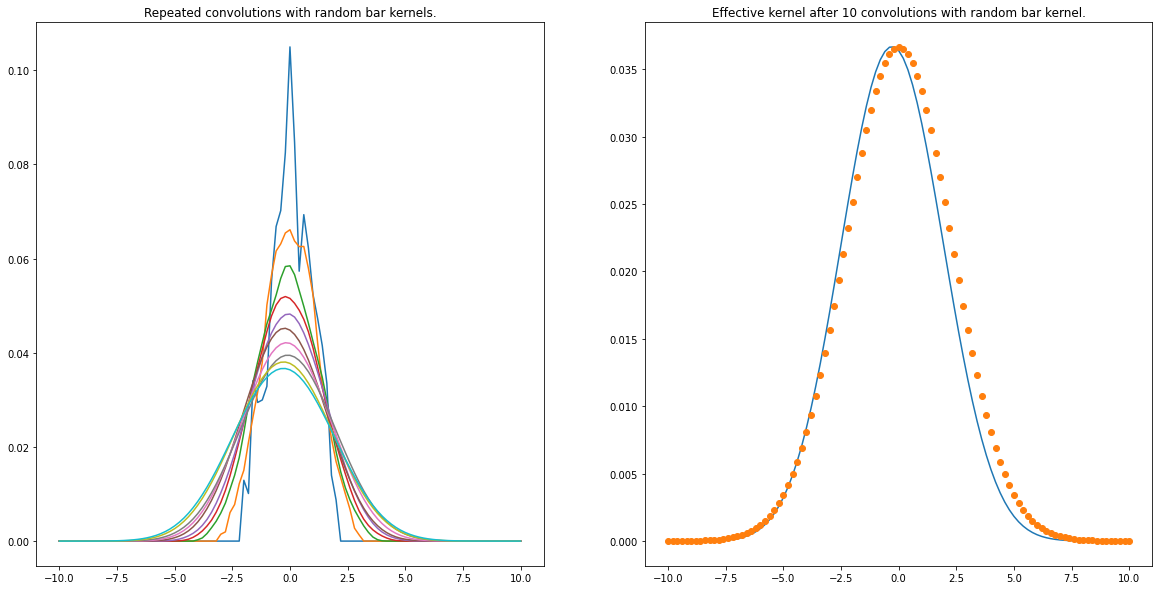

In [171]:
# repeated convolutions of random bar shaped kernels also results in a Gaussian shape
def r (x, w) :
    z = (np.random.rand(x.shape[0])) *np.less_equal(np.abs(x), w)
    return(z/z.sum())

h = r(t, 1)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

for i in range(10) :
    h = scimage.convolve(h, r(t, 1), origin = 0)
    plt.plot(t, h)
plt.title ('Repeated convolutions with random bar kernels.')
plt.subplot(1,2,2)
plt.plot(t, h)
g = gaussian(t, 2.3)
g = g*h.max()/g.max()
plt.plot(t, g, 'o')
plt.title('Effective kernel after 10 convolutions with random bar kernel.');


# 2D versions of the Gaussian filters

The 2D Gaussian kernel is given by
\begin{equation}
g(x, y) = \frac{1}{2 \pi \sigma^2} \exp -\frac{x^2 + y^2}{2 \sigma^2}
\end{equation}

Compare this with the form of the multi-dimension Gaussian pdf that we saw in Lecture 2. What are similarities and differences? Can you related the two forms mathematically?

The 2D correlate of the first derivative of Gaussian is the **[gradient](https://en.wikipedia.org/wiki/Gradient)** function given by a vector of derivatives along two orthogonal directions.

\begin{eqnarray}
\nabla g(x, y) & = & \left [ \begin{array}{c} \frac{d}{dx} g(x, y) \\ \frac{d}{dy} g(x, y) \end{array} \right ] \\
& = & \left [ \begin{array}{c} 
- \frac{x}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} \\ 
- \frac{y}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} 
\end{array} \right ]
\end{eqnarray}



The 2D equivalent of the second derivative of a Gaussian is the **Laplacian of a Gaussian** (LoG)
    
\begin{eqnarray}
        \nabla h(x, y) = \frac{\partial^2}{\partial x^2} h(x, y) + 
        \frac{\partial^2}{\partial y^2} h(x, y)
\end{eqnarray}

This kernel or filter shape is also found in the retina of the eyes. It was one of the earliest edge detector proposed by [Marr and Hildreth, 1980](https://royalsocietypublishing.org/doi/abs/10.1098/rspb.1980.0020). It is also referred to as the Mexican hat filter. (Plot the 3D shape of the filter and see why.)

Because of the linear property of the convolution operation, convolution with the LoG can be separated into two convolutions. 
